In [44]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [46]:
df = pd.read_csv(r"C:\Users\pc\Documents\GitHub\tfm_xavierMedina\vsCode - transformation\inhami_transformed.csv", delimiter=";")
print(df)


          Id  Estacion  longitud2  latitud2  altitud  anio  \
0          2         5   -804.601   -10.382     3140  1977   
1          3         0   -804.597   -10.379     3140  1978   
2          4         7   -804.604   -10.376     3140  1979   
3          5         4   -804.600   -10.376     3140  1980   
4          6         2   -804.595   -10.378     3140  1981   
...      ...       ...        ...       ...      ...   ...   
15422  20584         0   -804.597   -10.379     1955  2016   
15423  20585         1   -804.599   -10.377       21  2015   
15424  20586         4   -804.600   -10.376       21  2016   
15425  20587         4   -804.600   -10.376     2886  2017   
15426  20588         4   -804.600   -10.376     3427  2001   

       precipitaciones Dia  precipitaciones Noche  temperatura Dia  \
0                    102.8                   96.8             18.0   
1                     98.1                  161.5             21.0   
2                     71.2                   

In [47]:
# Convertir columnas necesarias a float
cols = [
    'precipitaciones Dia', 'precipitaciones Noche',
    'temperatura Dia', 'temperatura Noche',
    'Evapotranspiracion Dia', 'Evapotranspiracion Noche', 'radiacion Solar']
for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Eliminar filas con valores inválidos
df = df[~(df[cols] == 0).any(axis=1)]

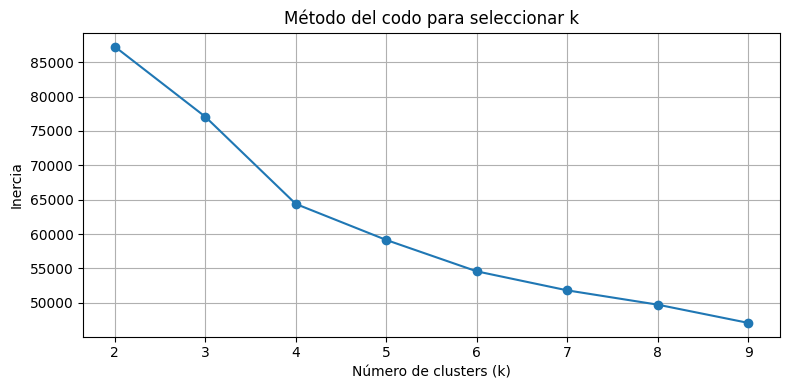

C:\Users\pc\AppData\Local\Temp\ipykernel_25624\2494752810.py:77: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


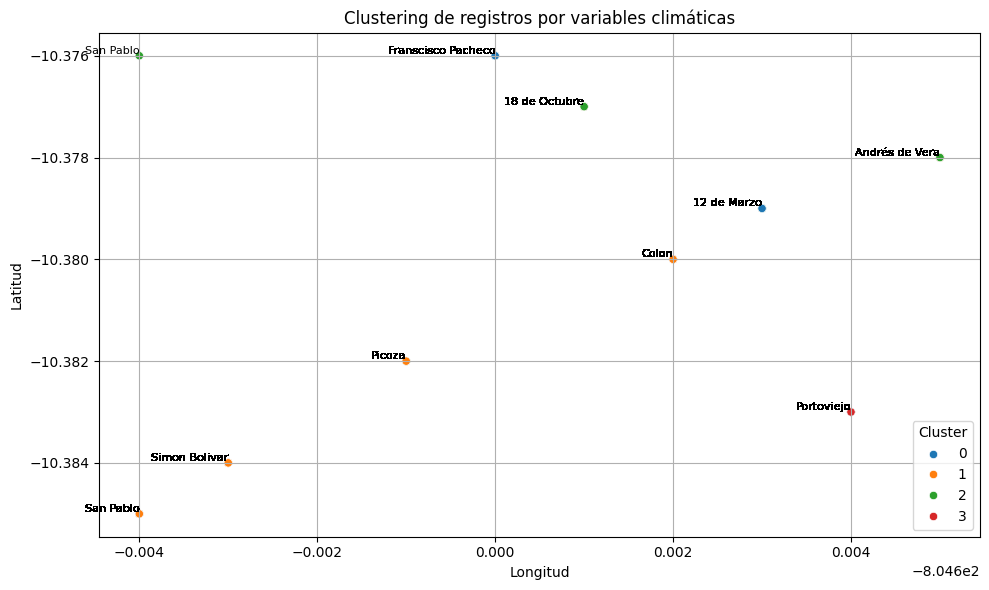

In [48]:
# --- Selección de variables para clustering ---
X = df[cols]

# Estandarizar variables 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Elegir número de clusters (k) ---
# método del codo para visualizar
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Método del codo para seleccionar k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Aplicar K-Means con el k elegido 
k = 4  # <-- ajustar este valor según el codo
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# --- Visualización simple (ejemplo 2D usando lat/long) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="longitud2", y="latitud2",
    hue="Cluster",
    palette="tab10"
)

# Añadir nombres de estación a cada punto
for i, row in df.iterrows():
    if row["Estacion"] == 0:
        Estacion = '12 de Marzo'
    elif row["Estacion"] == 1:
        Estacion = '18 de Octubre'
    elif row["Estacion"] == 2:
        Estacion = 'Andrés de Vera'
    elif row["Estacion"] == 3: 
        Estacion = 'Colon'
    elif row["Estacion"] == 4:
        Estacion = 'Franscisco Pacheco'
    elif row["Estacion"] == 5:
        Estacion = 'Picoza'
    elif row["Estacion"] == 6:
        Estacion = 'Portoviejo'
    elif row["Estacion"] == 7: 
        Estacion = 'San Pablo'
    elif row["Estacion"] == 8:
        Estacion = 'Simon Bolivar'
        
          
    plt.text(
        x=row["longitud2"],
        y=row["latitud2"],
        s=str(Estacion),   # O la columna con el nombre real si tienes una
        fontsize=8,
        ha='right',
        va='bottom'
    )


plt.title("Clustering de registros por variables climáticas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()


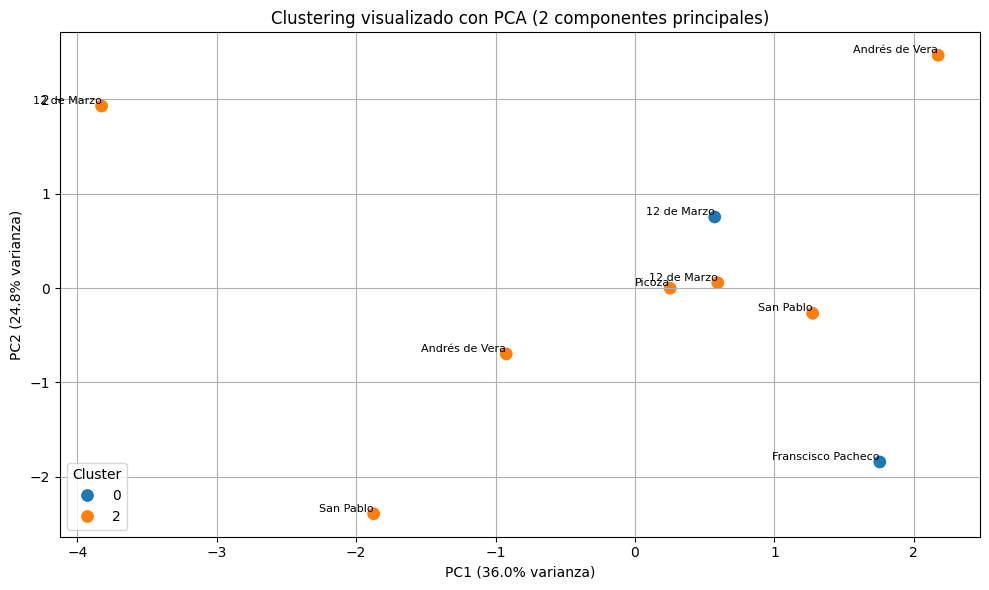

In [55]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los resultados y etiquetas de clúster
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']
df_pca['Estacion'] = df['Estacion']

# Visualizar en 2D con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    s=100
)

# Etiquetas de estaciones (si quieres verlas en el gráfico)
for i, row in df_pca.iterrows():
    plt.text(
        row['PC1'], row['PC2'],
        str(row['Estacion']),
        fontsize=8,
        ha='right',
        va='bottom'
    )

plt.title("Clustering visualizado con PCA (2 componentes principales)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)")
plt.grid(True)
plt.tight_layout()
plt.show()


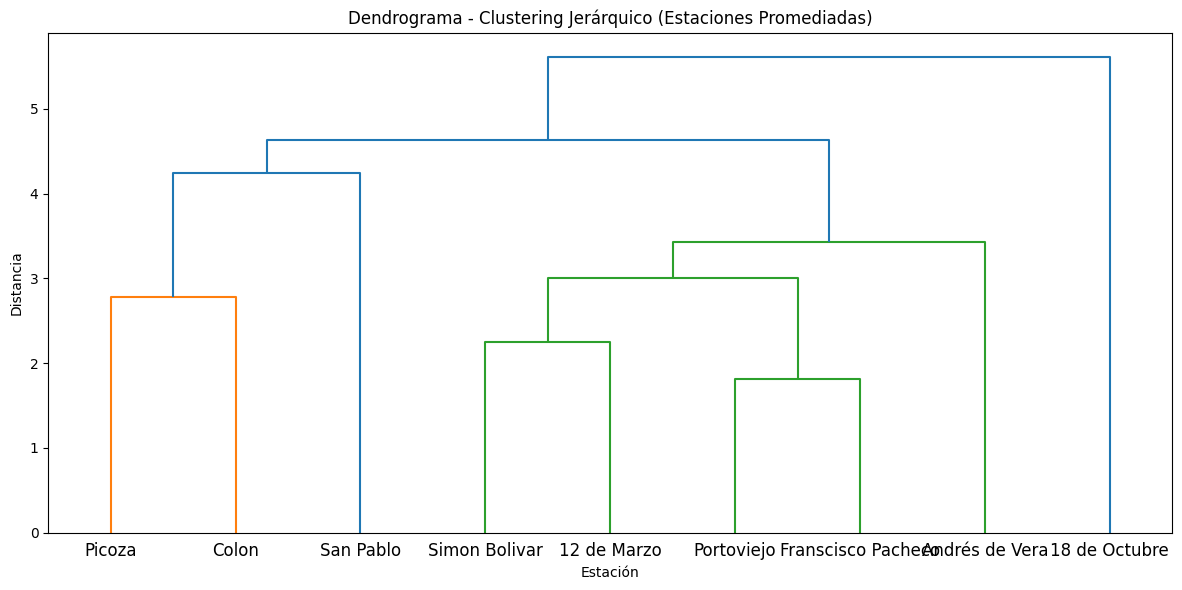

             Estacion  Cluster_Hierarchical
0         12 de Marzo                     1
1       18 de Octubre                     4
2      Andrés de Vera                     1
3               Colon                     2
4  Franscisco Pacheco                     1
5              Picoza                     2
6          Portoviejo                     1
7           San Pablo                     3
8       Simon Bolivar                     1


In [51]:


# Diccionario de mapeo
nombres_estaciones = {
    0: '12 de Marzo',
    1: '18 de Octubre',
    2: 'Andrés de Vera',
    3: 'Colon',
    4: 'Franscisco Pacheco',
    5: 'Picoza',
    6: 'Portoviejo',
    7: 'San Pablo',
    8: 'Simon Bolivar'
}

# Reemplazar los códigos por nombres
df["Estacion"] = df["Estacion"].map(nombres_estaciones)

# Cargar datos
#df = pd.read_csv("inhami_transformed.csv", sep=";", decimal=",")

# Variables a usar
variables = [
    'precipitaciones Dia', 'precipitaciones Noche',
    'temperatura Dia', 'temperatura Noche',
    'Evapotranspiracion Dia', 'Evapotranspiracion Noche',
    'latitud2', 'longitud2','Velocidad del Viento Dia', 'Velocidad del Viento Noche', 'radiacion Solar'
]

# Convertir a float
for col in variables:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Agrupar por estación
agrupadas = df.groupby("Estacion").agg({
    'precipitaciones Dia': 'mean',
    'precipitaciones Noche': 'mean',
    'temperatura Dia': 'mean',
    'temperatura Noche': 'mean',
    'Evapotranspiracion Dia': 'mean',
    'Evapotranspiracion Noche': 'mean',
    'Velocidad del Viento Dia': 'mean',
    'Velocidad del Viento Noche': 'mean',
    'radiacion Solar': 'mean'
   
}).reset_index()

# Estandarizar variables climáticas
climatic_vars = [
    'precipitaciones Dia', 'precipitaciones Noche',
    'temperatura Dia', 'temperatura Noche',
    'Evapotranspiracion Dia', 'Evapotranspiracion Noche'
]
X_scaled = StandardScaler().fit_transform(agrupadas[climatic_vars])

# Clustering jerárquico
linked = linkage(X_scaled, method='ward')

# Visualización del dendrograma
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=agrupadas["Estacion"].values,
    orientation='top',
    distance_sort='descending'
)
plt.title("Dendrograma - Clustering Jerárquico (Estaciones Promediadas)")
plt.xlabel("Estación")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Asignar clústeres (4 grupos)
agrupadas["Cluster_Hierarchical"] = fcluster(linked, t=4, criterion='maxclust')

# Ver resultados
print(agrupadas[["Estacion", "Cluster_Hierarchical"]])

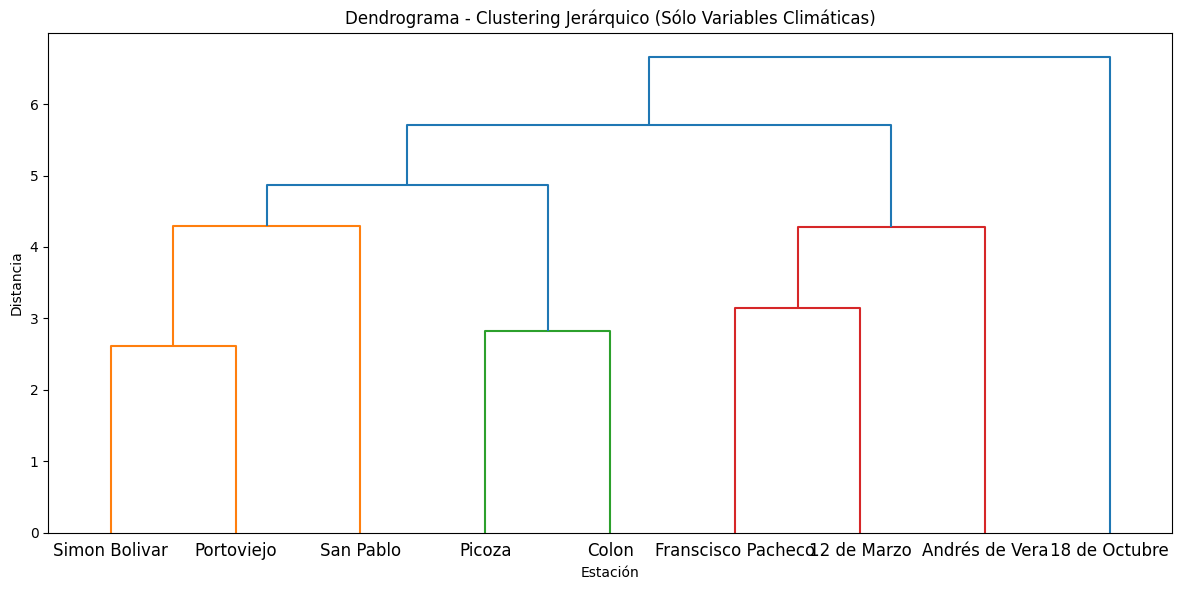


Resumen climático por clúster:
               precipitaciones Dia  precipitaciones Noche  temperatura Dia  \
Cluster_Clima                                                                
1                           168.53                 198.62            25.97   
2                           168.19                 196.07            26.22   
3                           162.60                 196.65            25.95   
4                           173.85                 202.20            25.98   

               temperatura Noche  Evapotranspiracion Dia  \
Cluster_Clima                                              
1                          19.95                   76.70   
2                          19.96                   80.23   
3                          20.00                   76.23   
4                          20.13                   69.19   

               Evapotranspiracion Noche  Velocidad del Viento Dia  \
Cluster_Clima                                                       


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# === Variables climáticas a usar ===
climatic_vars = [
    'precipitaciones Dia', 'precipitaciones Noche',
    'temperatura Dia', 'temperatura Noche',
    'Evapotranspiracion Dia', 'Evapotranspiracion Noche', 'Velocidad del Viento Dia', 'Velocidad del Viento Noche', 'radiacion Solar']

# === Agrupar por estación ===
agrupadas = df.groupby("Estacion")[climatic_vars].mean().reset_index()

# === Escalado de variables climáticas ===
X_scaled = StandardScaler().fit_transform(agrupadas[climatic_vars])

# === Clustering jerárquico (Ward) ===
linked = linkage(X_scaled, method='ward')

# === Visualizar dendrograma ===
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=agrupadas["Estacion"].values,
    orientation='top',
    distance_sort='descending'
)
plt.title("Dendrograma - Clustering Jerárquico (Sólo Variables Climáticas)")
plt.xlabel("Estación")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# === Asignar clústeres ===
agrupadas["Cluster_Clima"] = fcluster(linked, t=4, criterion='maxclust')

# === Mostrar resumen por grupo ===
resumen = agrupadas.groupby("Cluster_Clima")[climatic_vars].mean().round(2)
print("\nResumen climático por clúster:")
print(resumen)


